# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Confidence intervals
### VIDEO: Compute confidence intervals by formula
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

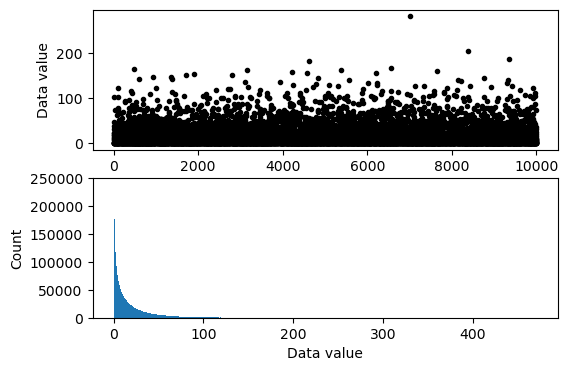

In [7]:
## simulate data

popN = int(1e7)  # lots and LOTS of data - 10 million data points ints!!

# the data (note: non-normal, has more of a power law distribution shape)
population = (4*np.random.randn(popN))**2 # gaussian random numbers that are squared and multiplied by 4, arbitrary randomized data

# we can calculate the exact population mean (note in the real world you may not be able to do this or be able to know the population mean)
popMean = np.mean(population)

# set up plot to look at data
fig,ax = plt.subplots(2,1,figsize=(6,4))

# with large sets of data, only plot every nth or here every 1000th sample
ax[0].plot(population[::1000],'k.') # plot every 1000th point since we have 10 million points, shown as black dots on top plot
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd') # the distribution shape of the data shown on bottom plot, we use the Freedman-Diaconis rule for number of bins
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
ax[1].set_ylim(0,250000)
plt.show()


In [ ]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples],ddof=1)

# compute confidence intervals
citmp = (1-confidence/100)/2
confint = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

# graph everything
fig,ax = plt.subplots(1,1)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean'))
plt.show()

In [8]:
## repeat for large number of samples

# parameters
samplesize = 50
confidence = 95  # in percent, we set out confidence interval manually here to be 95%
numExperiments = 5000

withinCI = np.zeros(numExperiments)


# part of the CI computation can be done outside the loop for more efficiency
citmp = (1-confidence/100)/2 # yeilds .025:  we get the lower and upper bound for confidence interval dividing by 2 (for two tails)
degrees_of_freedom = samplesize-1

# formula for confidence interval:
# note: CI_T is t-star from the formula
# ppf is Percent-Point Function which is the inverse of the Cumulative Distribution Function for a t-distribution. Finds inverse of cdf given a probability.
CI_T  = stats.t.ppf([citmp, 1-citmp],degrees_of_freedom) # citmp is .025 and .0975 for 1-citmp (2.5 and 97.5% of the distribution for the CI bounds)
sqrtN = np.sqrt(samplesize)

for expi in range(numExperiments):
    
    # compute sample mean and CI as above
    # popN is 10 million or 1e7
    randSamples = np.random.randint(0,popN,samplesize)  # take 50 samples/random ints from the population
    samplemean  = np.mean(population[randSamples])
    samplestd   = np.std(population[randSamples],ddof=1) # std dev of the sample, so we use ddof of 1
    confint     = samplemean + CI_T * samplestd/sqrtN
    
    # determine whether the True mean is inside this CI
    if popMean>confint[0] and popMean<confint[1]:
        withinCI[expi] = 1
        

print('%g%% of sample C.I.''s contained the true population mean.'%(100*np.mean(withinCI)))


91.76% of sample C.I.s contained the true population mean.
